 # 1. VARIABLE RANKING BY LINEAR CORRELATION COEFFICIENT

In [62]:
import numpy as np
from matplotlib import pyplot as plt

In [63]:
data = np.loadtxt('./leaf/leaf.csv', delimiter=',')
correlation_coefs = {"2. Specimen Number" : 1,
"3. Eccentricity":2,
"4. Aspect Ratio":3,
"5. Elongation":4,
"6. Solidity":5,
"7. Stochastic Convexity":6,
"8. Isoperimetric Factor":7,
"9. Maximal Indentation Depth":8,     
"10. Lobedness":9,
"11. Average Intensity":10,
"12. Average Contrast":11,
"13. Smoothness":12,
"14. Third moment":13,
"15. Uniformity":14,
"16. Entropy" : 15
}

correlation_coefs = {key:np.corrcoef(data[:,value],data[:,0])[0,1] for key, value in correlation_coefs.items()}
ordered_corrcoef = {k: v for k, v in sorted(correlation_coefs.items(), key=lambda x: x[1])}
print(ordered_corrcoef)

{'8. Isoperimetric Factor': -0.049766613170472214, '9. Maximal Indentation Depth': -0.04002558235513153, '10. Lobedness': -0.017048050594139542, '2. Specimen Number': -0.015142016547326375, '16. Entropy': 0.017690039653981887, '7. Stochastic Convexity': 0.04667831920371114, '14. Third moment': 0.05852012269141434, '12. Average Contrast': 0.0762464527076986, '3. Eccentricity': 0.0914146030208963, '13. Smoothness': 0.09488520535309274, '11. Average Intensity': 0.10245321896478966, '6. Solidity': 0.11184290470599254, '5. Elongation': 0.14127524729577032, '15. Uniformity': 0.18771684999019717, '4. Aspect Ratio': 0.27521011784907823}


## According to the variable ranking using linear coeff correlation, the aspect ratio is the most important feature to take into account

# 2. VARIABLE RANKING BY MUTUAL INFORMATION

In [64]:
import pandas as pd

In [65]:
columns_name = ["Class_Name","Handicapped_infants","Water_project_cost_sharing","Adoption_of_the_budget_resolution","Physician_fee_freeze","El_salvador_aid","Religious_groups_in_schools","Anti_satellite_test_ban","Aid_to_nicaraguan_contras","Mx_missile","Immigration","Synfuels_corporation_cutback","Education_spending","Superfund_right_to_sue", "Crime","Duty_free_exports", "Export_administration_act_south_africa"]

In [66]:
df = pd.read_csv("house-votes-84.data", header=None,names=columns_name)

In [67]:
def mut_info_by_column(df,col):
    total = len(df)
    prob_class=df.groupby(["Class_Name"]).agg(n=(col,lambda s: (s=="n").sum()),y=(col,lambda s: (s=="y").sum()),unk=(col,lambda s: (s=="?").sum())).reset_index()
    prob_by_group = prob_class.to_numpy()
    
    prob_dem_no=prob_by_group[0,1]/total
    prob_dem_yes=prob_by_group[0,2]/total
    prob_dem_unk=prob_by_group[0,3]/total
    
    prob_rep_no=prob_by_group[1,1]/total
    prob_rep_yes=prob_by_group[1,2]/total
    prob_rep_unk=prob_by_group[1,3]/total
    
    prob_total_dem=prob_by_group[0,1:].sum()/total
    prob_total_rep=prob_by_group[1,1:].sum()/total
    
    prob_total_no=prob_by_group[:,1].sum()/total
    prob_total_yes=prob_by_group[:,2].sum()/total
    prob_total_unk=prob_by_group[:,3].sum()/total
    
    mut_info_= prob_dem_no * np.log(prob_dem_no/((prob_total_dem)*(prob_total_no)))+prob_rep_no * np.log(prob_rep_no/((prob_total_rep)*(prob_total_no)))+ prob_dem_yes * np.log(prob_dem_yes/((prob_total_dem)*(prob_total_yes)))+prob_rep_yes * np.log(prob_rep_yes/((prob_total_rep)*(prob_total_yes)))+prob_dem_unk * np.log(prob_dem_unk/((prob_total_dem)*(prob_total_unk)))+ prob_total_unk * np.log(prob_total_unk/((prob_total_unk)*(prob_total_rep)))
    return mut_info_


mut_info = {}
for i in columns_name[1:]:
    next_item = {i:mut_info_by_column(df,i)}
    mut_info.update(next_item)


ordered_mut_info = {k: v for k, v in sorted(mut_info.items(), key=lambda x: x[1])}
ordered_mut_info

{'Immigration': 0.018114255375292432,
 'Water_project_cost_sharing': 0.10173978345183635,
 'Handicapped_infants': 0.1166316466312636,
 'Synfuels_corporation_cutback': 0.11814441653638101,
 'Religious_groups_in_schools': 0.12957696880609668,
 'Anti_satellite_test_ban': 0.16620705689945756,
 'Duty_free_exports': 0.21113823446267935,
 'Superfund_right_to_sue': 0.21177007198287123,
 'Aid_to_nicaraguan_contras': 0.2524178116445893,
 'Crime': 0.26855022284442065,
 'Mx_missile': 0.27055716162227994,
 'Adoption_of_the_budget_resolution': 0.3242721821378084,
 'Education_spending': 0.32474990317409574,
 'Export_administration_act_south_africa': 0.3285876903159665,
 'El_salvador_aid': 0.3301649578335484,
 'Physician_fee_freeze': 0.5394088028356653}

## According to the variable ranking using mutual information, the physican fee freeze policy is the most important criteria for classifying the party of vote

# 3. PCA

In [68]:
data = np.loadtxt('ionosphere.data', delimiter=',', usecols=range(2,34))

In [69]:
cov_matrix = np.cov(data.T)

In [70]:
values, vectors = np.linalg.eig(cov_matrix)

In [74]:
explained_variances = np.zeros((values.shape[0],2))
for i in range(len(values)):
    explained_variances[i,0]=values[i] / np.sum(values)
    explained_variances[i,1]= int(i)+2

ordered_variances = explained_variances[explained_variances[:,0].argsort()[::-1]]
sum_var= 0.0
PCA = []
i= 0

#only accept the variables that contains 95% of the explained variance
while sum_var < 0.95:
    sum_var = sum_var + ordered_variances[i,0]
    PCA.append((lambdas[i],i+2))
    i=i+1
PCA = np.array(PCA)

In [75]:
lambdas = -np.sort(-values)
lambdas = lambdas[[i for i, x in enumerate(lambdas) if x.any()]]

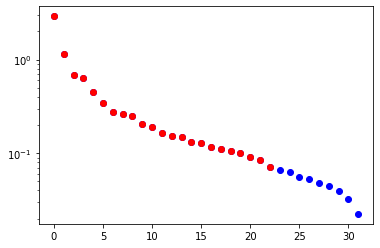

In [76]:
fig = plt.figure()
ax = plt.gca()
bx = plt.gca()
ax.scatter(range(lambdas.shape[0]),lambdas, c='b')
bx.scatter(range(PCA.shape[0]),PCA[:,0], c='r')
ax.set_yscale('log')

In [77]:
print("columns accepted by PCA : ", PCA[:,1])

columns accepted by PCA :  [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24.]


# 4. DISTANCES AND SIMILARITIES

# MAHALANOBIS DISTANCE

In [136]:
# Using the 3 most relevant columns according to linear correlation coefficient
X = np.loadtxt('./leaf/leaf.csv', delimiter=',', usecols=(3,4,5))

In [158]:
def calculateMahalanobis(X):
"""Distance between a point and a data distriubtion in a multivariate space""" 
    X_ij= X - np.mean(X)
    inv_covmat = np.linalg.inv(np.cov(X.T))
    left = np.dot(X_ij, inv_covmat)
    mahal = np.dot(left,X_ij.T)
    return mahal.diagonal()

In [159]:
calculateMahalanobis(X)

array([106.64779545, 101.53537879,  97.89417094, 103.14852746,
        91.00589641, 103.26308097,  90.45415322,  96.7327361 ,
        88.6718183 ,  75.48697327, 104.32150023,  91.29048146,
        69.1969447 ,  72.66639665,  75.56214436,  80.88579705,
        71.66581958,  76.83124215,  84.30212681,  75.95040682,
        68.3564082 ,  86.47190272, 108.67605694, 110.0741001 ,
       112.61497623, 102.44381221, 107.60970315, 119.37384032,
       113.42484027, 114.29060221, 107.07965251, 113.99920383,
       133.43016321, 114.96357142,  99.69179462, 115.45565385,
       114.22554383, 101.5694904 , 134.69670134, 122.65089928,
        86.00003039,  93.34743537,  90.65858292,  80.4295514 ,
        88.17789589,  84.45160245,  89.09563374,  83.81038971,
        82.80158053,  83.43086424,  88.60595362,  86.82431558,
       104.66557693,  99.95755538,  87.46728113, 109.42057634,
        91.85148761,  97.38325143,  87.67709512,  99.55651275,
       103.93756938, 112.00945854,  97.81068879,  97.58

# Euclidean distance (p=2)

In [147]:
X_PCA = np.loadtxt('ionosphere.data', delimiter=',', usecols=range(2,25))

In [162]:
n, d = X_PCA.shape
distances = np.zeros((n,n))

for i in range(n):
    for j in range(i + 1, n):
        distance = np.sqrt(((X_PCA[i,:] - X_PCA[j,:])**2).sum(axis=0)) 
        distances[i, j] = distance
        distances[j, i] = distance
print(distances)

[[0.         2.47205415 0.95973777 ... 1.47269689 1.3186655  1.28753301]
 [2.47205415 0.         3.02372638 ... 3.64911192 3.50216615 3.40251921]
 [0.95973777 3.02372638 0.         ... 0.92513131 0.83065922 0.71786892]
 ...
 [1.47269689 3.64911192 0.92513131 ... 0.         0.28187715 0.51682568]
 [1.3186655  3.50216615 0.83065922 ... 0.28187715 0.         0.49656706]
 [1.28753301 3.40251921 0.71786892 ... 0.51682568 0.49656706 0.        ]]


# Hamming distances

In [42]:
#regarding numbers
def hamming_numbers(x, y):
    return bin(x ^ y).count('1')

In [43]:
#general approach
def hamming_strings(s1,s2):
    result=0
    if len(s1)!=len(s2):
        print("not equal length!")
    else:
        for x,(i,j) in enumerate(zip(s1,s2)):
            if i!=j:
                result+=1
    return result

In [44]:
def hamming_distances(X):
    """Hamming distances between rows of data"""
    rows,cols = X.shape
    X_ij = np.zeros((rows,rows))
    for i in range(rows):
        for j in range(rows):
            X_ij[i,j]= hamming_strings(X[i,:],X[j,:])
    return X_ij

In [45]:
hamming_distances(HD_data)

array([[ 0.,  3.,  8., ...,  3.,  6.,  3.],
       [ 3.,  0.,  7., ...,  3.,  6.,  3.],
       [ 8.,  7.,  0., ...,  7., 12.,  8.],
       ...,
       [ 3.,  3.,  7., ...,  0.,  6.,  5.],
       [ 6.,  6., 12., ...,  6.,  0.,  7.],
       [ 3.,  3.,  8., ...,  5.,  7.,  0.]])